In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



#Battery Layout: LG Chem Batterys, 396 cells, into 33 modules of 12 cells each, 396 cells divided into two sets connected in pararell. In each set there are 198 cells connect in series
#Porche HOld back 10kW of power for DOD which is why they use 83.7kW, this extends life of the pack
# Max charging power is 270kW
# Each cell is 3.1V when depleted but 4.2V when fully charge
#Each Cell is rated at 64.5Ah

FWFET= np.loadtxt('FWFET(2).txt', dtype=float)


Batterys_total = 396 #Total number of individual cells
Batterys_series = 198
Packs_parallel = 2 #Number of packs in parallel
Max_V = 4.2 #V
Min_V = 3.0 #V
Avg_V = 3.7 #V
Battery_Charge = 64.5 #Ah

V_b_max = Batterys_series * Max_V
V_b_min = Batterys_series * Min_V

G_Energy_Capacity = Avg_V * Battery_Charge * Batterys_total
N_Energy_Capacity = G_Energy_Capacity*0.885

G_Coulometric_Capacity = G_Energy_Capacity/V_b_max
N_Coulometric_Capacity = N_Energy_Capacity/V_b_max

Max_SOC = 1.0
Min_SOC = 0.01



Max Battery Voltage = 831.6 [V]
Gross Battery Capacity = 94.50540000000001 [kWh]
Net Battery Capacity = 83.637279 [kWh]
Net Coulometric Battery Capacity = 100.57392857142858 [Ah]
Average Time to Discharge at 20.1 [A] = 4.953641257995736 [h]
Average Highway distance = 385.0465349840086 [km]


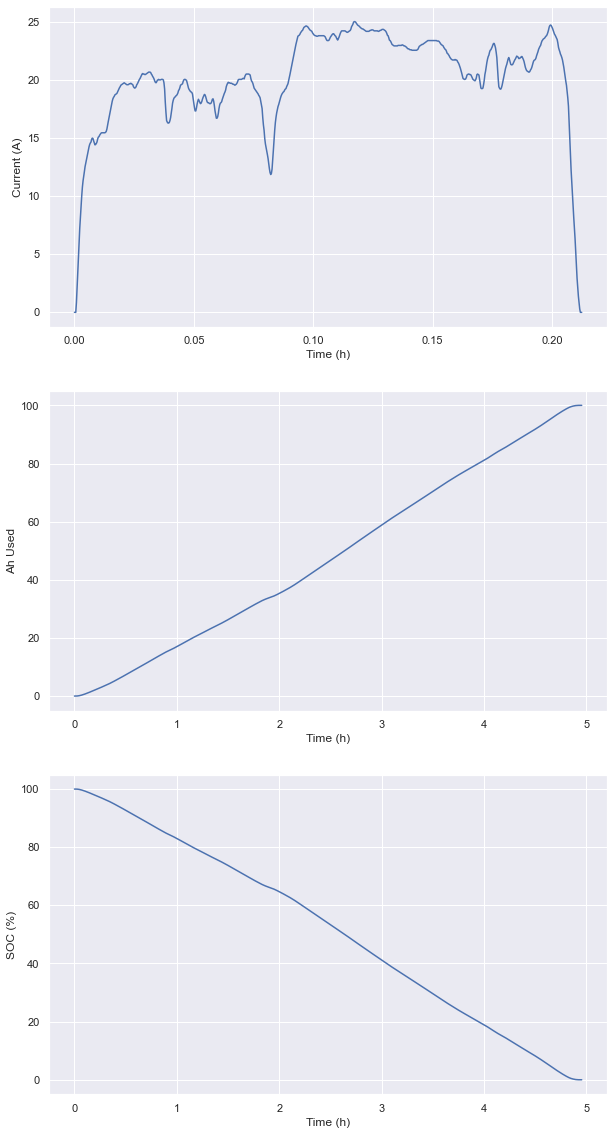

In [45]:
AVG_HWFET_SPEED = 77.73 #km/h
i = 20.1 #A

t_dis = (Max_SOC - Min_SOC) * (N_Coulometric_Capacity/i)
HWFET_distnace = t_dis * AVG_HWFET_SPEED


print("Max Battery Voltage =",V_b_max, "[V]")
print("Gross Battery Capacity =",G_Energy_Capacity/1000, "[kWh]")
print("Net Battery Capacity =",N_Energy_Capacity/1000, "[kWh]")
print("Net Coulometric Battery Capacity =",N_Coulometric_Capacity,"[Ah]")
print("Average Time to Discharge at 20.1 [A] =", t_dis, "[h]")
print("Average Highway distance =",HWFET_distnace, "[km]")

#Asher said drain it and plot
#driving at x speed what will range be. 
#Plot of miles driven vs capacity
#Assume constant voltage throughout

time_h = ((FWFET[:,0])/3600)*23.31
speed_kph = (FWFET[:,1])*23.31
current = (FWFET[:,2])*23.31
Ah = (FWFET[:,3])*23.31
Ah_cumulative = np.cumsum(Ah)
SOC = Ah_cumulative

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 20)

plot1 = plt.subplot(311)
plot2 = plt.subplot(312)
plot3 = plt.subplot(313)


plot1.plot(time_h/23.31, current/23.31)
plot1.set_xlabel("Time (h)")
plot1.set_ylabel("Current (A)")

plot2.plot(time_h, Ah_cumulative)
plot2.set_xlabel("Time (h)")
plot2.set_ylabel("Ah Used")

plot3.plot(time_h, 100-SOC)
plot3.set_xlabel("Time (h)")
plot3.set_ylabel("SOC (%)")

plt.show()

Average Time to Discharge at 8.19 [A] = 12.157288069073786 [h]
Average City distance = 383.3192928178965 [km]


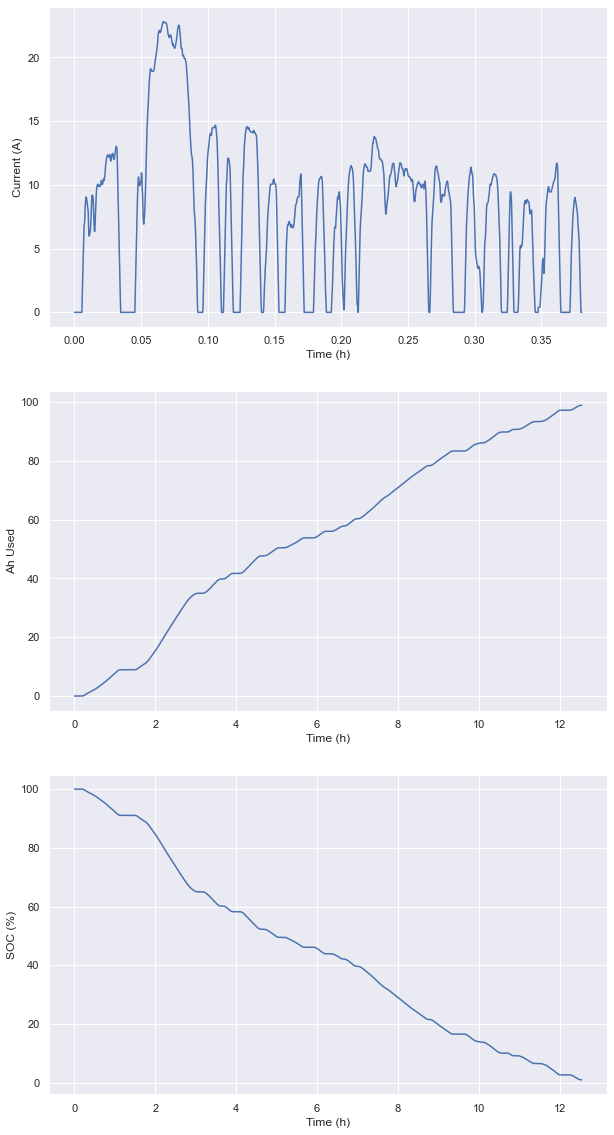

In [46]:
UDDS= np.loadtxt('UDDS.txt', dtype=float)



AVG_USSD_SPEED = 31.53 #km/h
USSD_dist = 11.99 #km
Avg_current = 8.19 #A over 11.99km

t_dis = (Max_SOC - Min_SOC) * (N_Coulometric_Capacity/Avg_current)
USSD_distnace = t_dis * AVG_USSD_SPEED

print("Average Time to Discharge at 8.19 [A] =", t_dis, "[h]")
print("Average City distance =",USSD_distnace, "[km]")

time_h = ((UDDS[:,0])/3600)*33
speed_kph = (UDDS[:,1])*33
current = (UDDS[:,2])*33
Ah = (UDDS[:,3])*33
Ah_cumulative = np.cumsum(Ah)
SOC = Ah_cumulative

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 20)

plot1 = plt.subplot(311)
plot2 = plt.subplot(312)
plot3 = plt.subplot(313)


plot1.plot(time_h/33, current/33)
plot1.set_xlabel("Time (h)")
plot1.set_ylabel("Current (A)")

plot2.plot(time_h, Ah_cumulative)
plot2.set_xlabel("Time (h)")
plot2.set_ylabel("Ah Used")

plot3.plot(time_h, 100-SOC)
plot3.set_xlabel("Time (h)")
plot3.set_ylabel("SOC (%)")

plt.show()